In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import math
%cd C:\Users\praga\Downloads\PRML\Assign1
df=pd.read_csv('Dataset.csv',header = None)

X=df.to_numpy()


C:\Users\praga\Downloads\PRML\Assign1


In [2]:
def kernelfunc(a,b,sigma=None):#func for K--- norm(x)
    norma=np.linalg.norm(a)
    normb=np.linalg.norm(b)
    return (norma*normb+1)**2

In [3]:
def Kmeans(Xa,K):#kmeans
    mus=np.random.choice(len(Xa),K,replace=False)
    means=Xa[mus]
    deg=len(means[0])
    clustinds=np.array([0 for i in range(len(Xa))])
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(Xa))])
    errorfunc=[]
    distmat=get_dist(means,Xa)
    clustinds=np.argmin(distmat,axis=1)
    loss=np.sum(np.min(distmat,axis=1))
    errorfunc.append(loss)
    noconv=1
    while noconv:
        loss=0
        means=get_means(K,clustinds,Xa,deg)#means step
        distmat=get_dist(means,Xa)
        clustinds=np.argmin(distmat,axis=1)
        loss=np.sum(np.min(distmat,axis=1))
        if loss==errorfunc[-1]:
            noconv=0
        errorfunc.append(loss)
    return means, clustinds, errorfunc

In [4]:
def get_means(K,clustind,Xa,d=6):#the mean substep
    means=np.zeros((K,d))
    meanscount=np.zeros(K)
    for i in range(len(Xa)):
        means[clustind[i]]+=Xa[i]
        meanscount[clustind[i]]+=1
    for r in range(K):
        if np.sum(means[r]):
            means[r]=means[r]/meanscount[r]
    return means
    

In [5]:
def get_dist(means,Xa):#distance calc
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(Xa))])
    for i in range(len(Xa)):
        dist[i]=np.sum((Xa[i]-means)**2,axis=1)
    return dist
        
    

In [6]:
def spectralize():
    import numpy as np#get h* normalized
    import math
    K=np.array([[0.0]*1000]*1000)#initialize K
    for i in range(1000):#computing Kernel
        for j in range(i,1000):
            K[i,j]=K[j,i]=kernelfunc(X[i],X[j])
    evals, evecs = np.linalg.eigh(K)#gives eigen in ascending and normalized vectors
    evecs = evecs[:,::-1]
    evals = evals[::-1]
    H=evecs[:,0:4]
    normalize=np.linalg.norm(H,axis=1)
    Hstar=H.copy()
    for i in range(1000):
        Hstar[i]=H[i]/normalize[i]
    Hstar[np.isnan(Hstar)]=0
    return Hstar

In [22]:
def Spectral():
    
    Hstar=spectralize()
    clusts=Kmeans(Hstar,4)
    plotter(clusts)
#     return
    return clusts,Hstar
    
    
    

In [8]:
def plotter(Kres):
    means=Kres[0]
    K=len(means)
    clusters=[[] for i in range(K)]
    for t in range(len(X)):
        clusters[Kres[1][t]].append(X[t])
        
    fig,ax=plt.subplots(1,2,figsize=(16,5))
    
    ax[0].scatter(np.array(clusters[0])[:,0],np.array(clusters[0])[:,1],marker='*',color='r')
    ax[0].scatter(np.array(clusters[1])[:,0],np.array(clusters[1])[:,1],marker='*',color='g')
    ax[0].scatter(np.array(clusters[2])[:,0],np.array(clusters[2])[:,1],marker='*',color='b')
    ax[0].scatter(np.array(clusters[3])[:,0],np.array(clusters[3])[:,1],marker='*',color='y')
    ax[0].scatter(means[:,0],means[:,1],marker='D',color='black')
    ax[0].title.set_text('Spectral Kmeans-4, Norm kernel')
    ax[0].set(xlabel='X: 1st component ->', ylabel='X: 2nd component ->')
    ax[0].legend(['Cluster1','Cluster2','Cluster3','Cluster4',"means"])
    ax[1].plot(Kres[-1])
    ax[1].set(xlabel="Iterations", ylabel="Error")
    ax[1].title.set_text("Error Function")
    
        
        

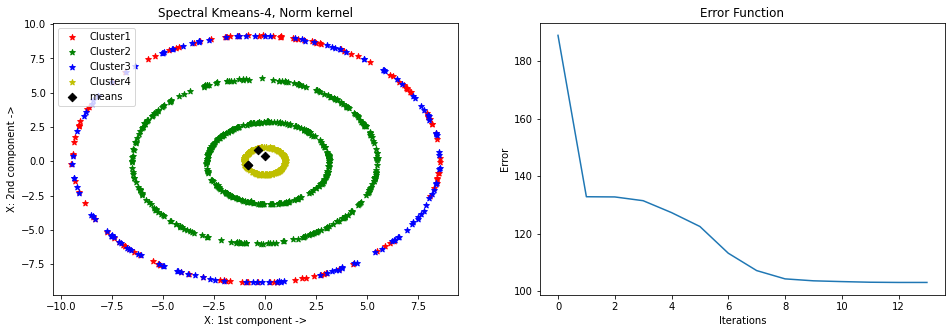

In [9]:
Spectral()

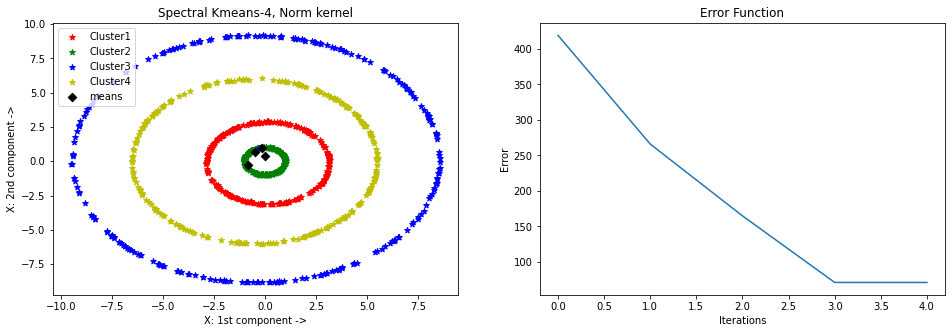

In [10]:
Spectral()

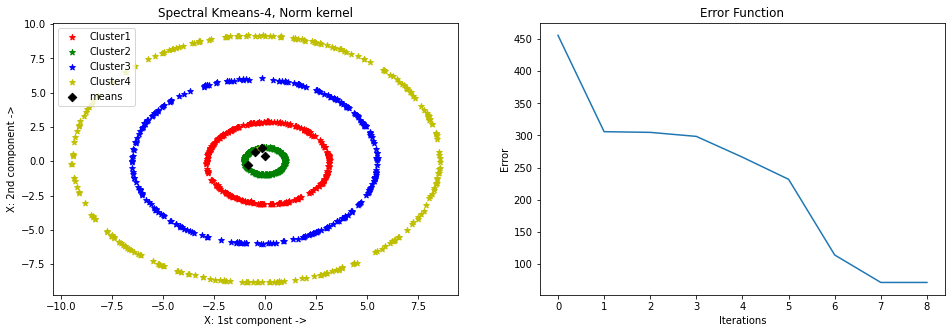

In [11]:
Spectral()

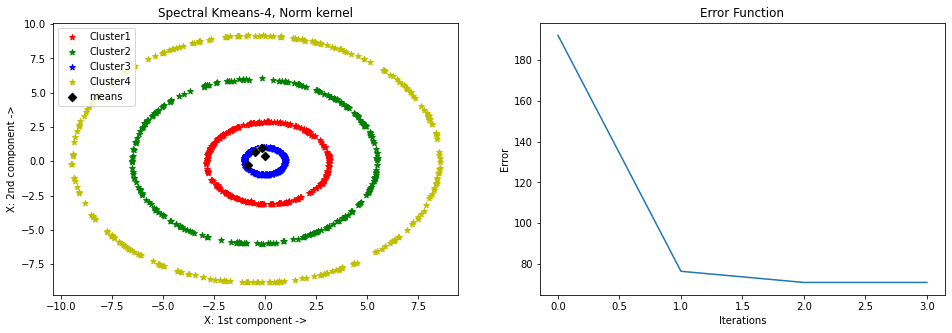

In [23]:
a=Spectral()

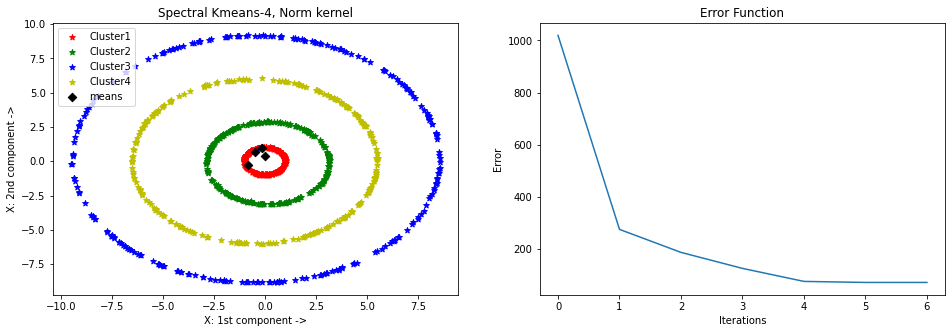

In [24]:
b=Spectral()

In [26]:
a[0]

(array([[-0.15391145,  0.98309035, -0.00166718,  0.01548439],
        [-0.4892177 ,  0.65415671, -0.52540286, -0.01483747],
        [-0.01442084,  0.37450422,  0.91688541,  0.04427447],
        [-0.83556621, -0.28122319,  0.15017145,  0.00105394]]),
 array([2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2,